Importing


In [23]:
import warnings, requests, zipfile, io
warnings.simplefilter('ignore')
import pandas as pd
from scipy.io import arff

Download and Extract

In [4]:
f_zip = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00212/vertebral_column_data.zip'
r = requests.get(f_zip, stream=True)
Vertebral_zip = zipfile.ZipFile(io.BytesIO(r.content))
Vertebral_zip.extractall()

Visulaize data with Pandas 

In [5]:
data = arff.loadarff('column_2C_weka.arff')
df = pd.DataFrame(data[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


Operations with Pandas 

In [6]:
df.shape   # number of rows and columns in the dataset

(310, 7)

In [7]:
df.columns # column names , You can see the six biomechanical features, and the target column is named class. 

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

In [8]:
df.dtypes  # data types of the columns 

pelvic_incidence            float64
pelvic_tilt                 float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [9]:
df['pelvic_incidence'].describe() # summary statistics of the column pelvic_incidence

count    310.000000
mean      60.496653
std       17.236520
min       26.147921
25%       46.430294
50%       58.691038
75%       72.877696
max      129.834041
Name: pelvic_incidence, dtype: float64

In [10]:
df.describe() # summary statistics of the dataset 

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


<Axes: >

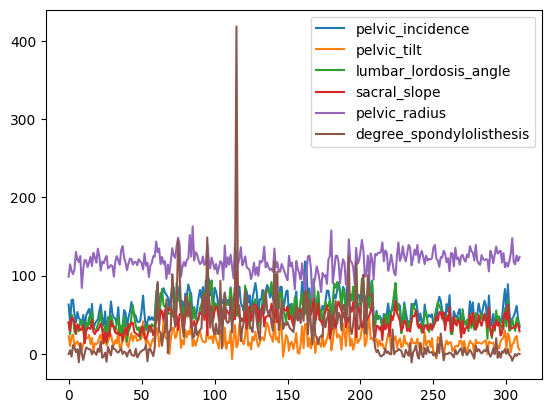

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot() # plot all the columns in the dataset 

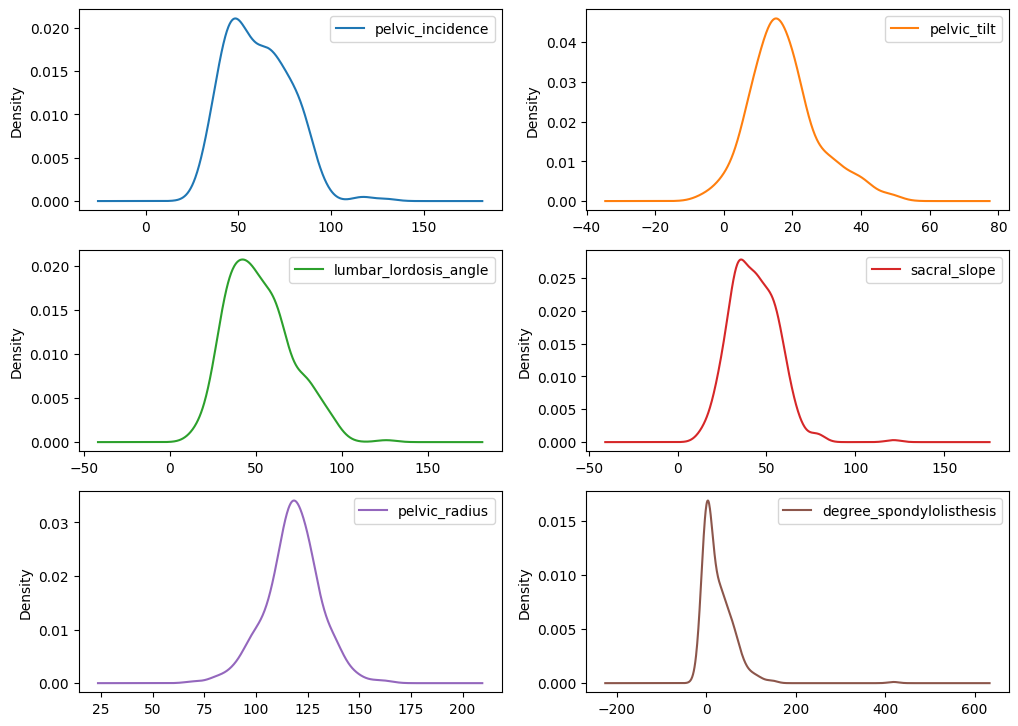

In [12]:
df.plot(kind='density',subplots=True,layout=(4,2),figsize=(12,12),sharex=False)
plt.show()

<Axes: ylabel='Density'>

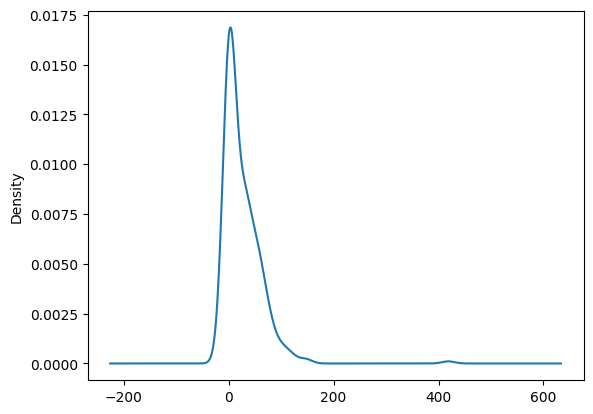

In [13]:
df['degree_spondylolisthesis'].plot.density()

<Axes: ylabel='Frequency'>

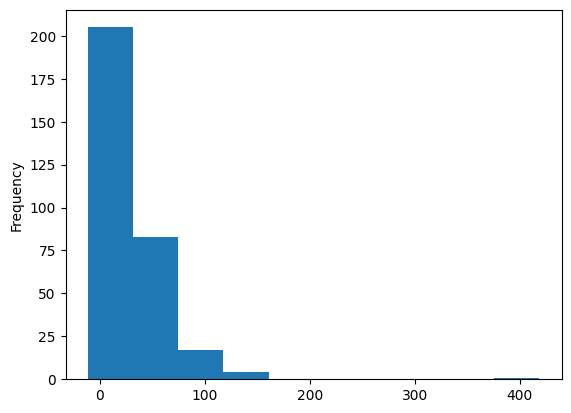

In [14]:
df['degree_spondylolisthesis'].plot.hist()

<Axes: >

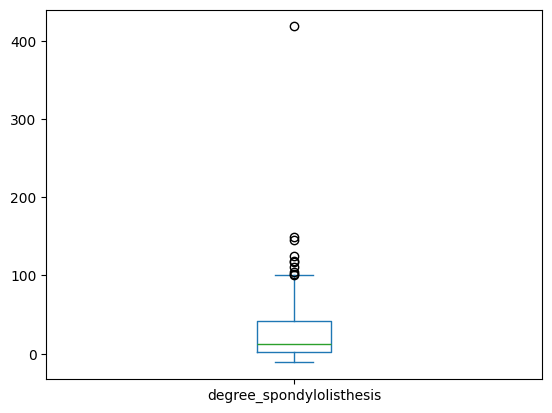

In [15]:
df['degree_spondylolisthesis'].plot.box()

In [16]:
df['class'].value_counts() # count of each class in the target column

class
b'Abnormal'    210
b'Normal'      100
Name: count, dtype: int64

In [17]:
class_mapper = {b'Abnormal':1,b'Normal':0}
df['class']=df['class'].replace(class_mapper) # converting the target column to binary values

<Axes: xlabel='class', ylabel='degree_spondylolisthesis'>

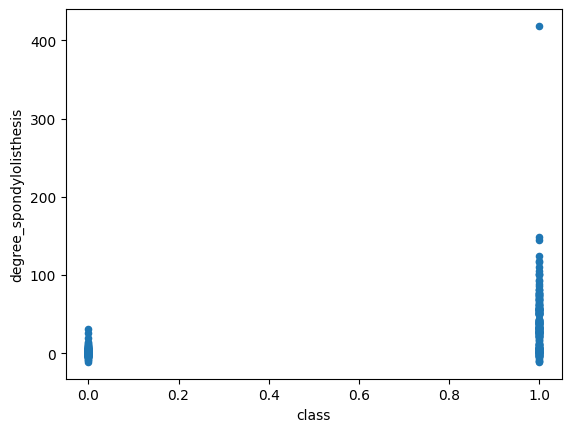

In [18]:
df.plot.scatter(y='degree_spondylolisthesis',x='class')

0         Axes(0.1,0.15;0.363636x0.75)
1    Axes(0.536364,0.15;0.363636x0.75)
dtype: object

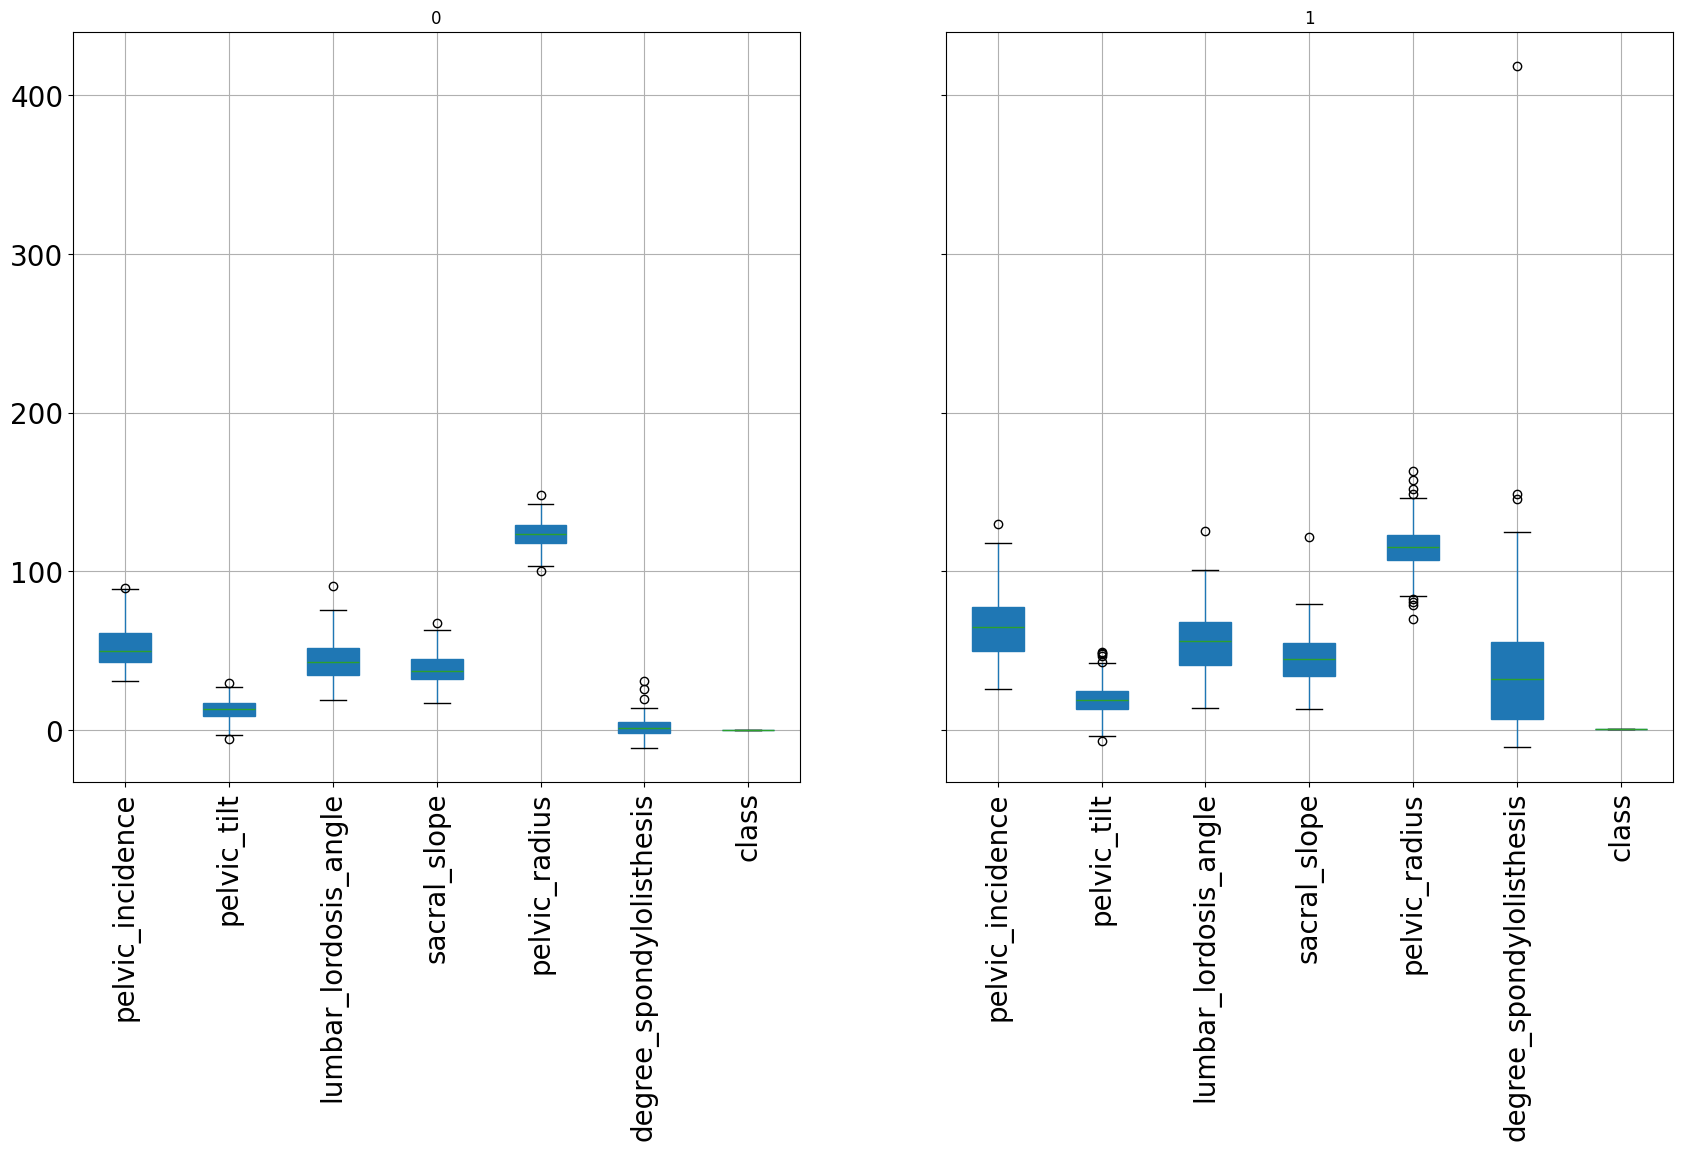

In [19]:
df.groupby('class').boxplot(fontsize=20,rot=90,figsize=(20,10),patch_artist=True)

In [20]:
corr_matrix = df.corr()      # correlation matrix of the dataset 
corr_matrix["class"].sort_values(ascending=False)

class                       1.000000
degree_spondylolisthesis    0.443687
pelvic_incidence            0.353336
pelvic_tilt                 0.326063
lumbar_lordosis_angle       0.312484
sacral_slope                0.210602
pelvic_radius              -0.309857
Name: class, dtype: float64

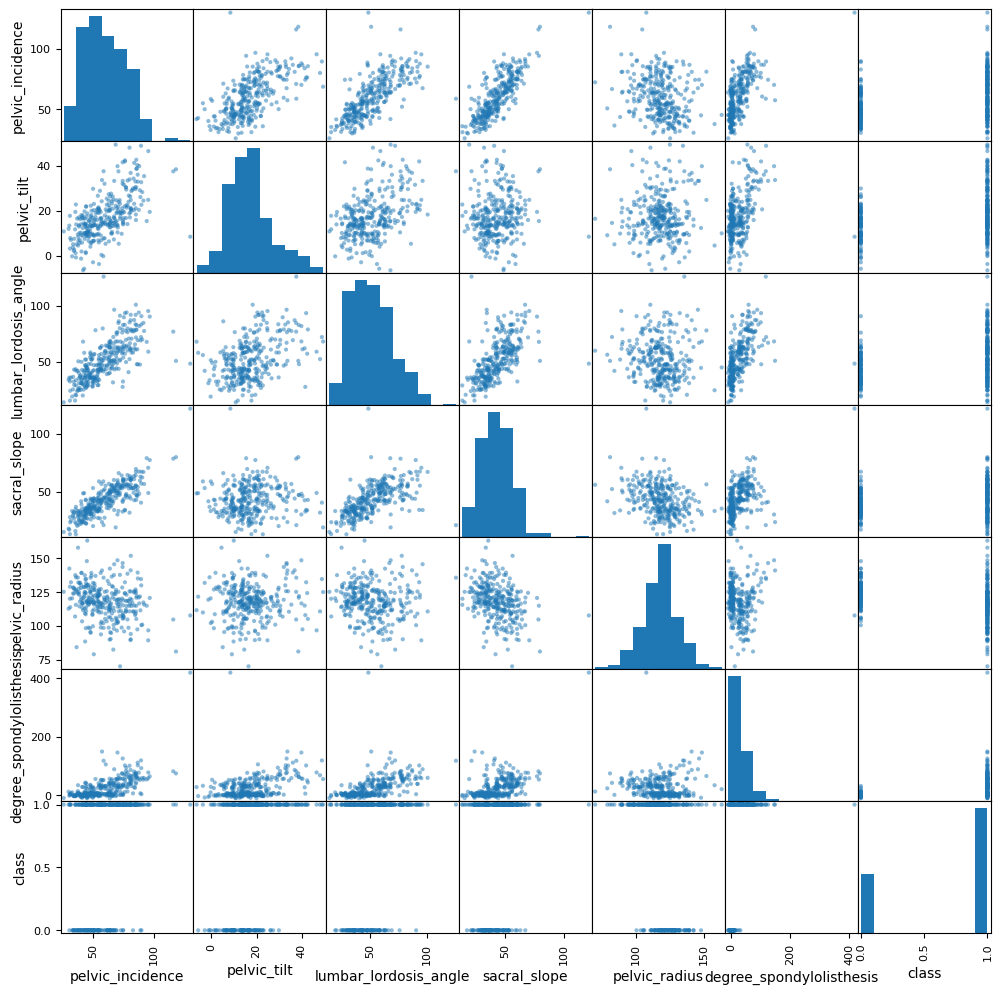

In [21]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show() 

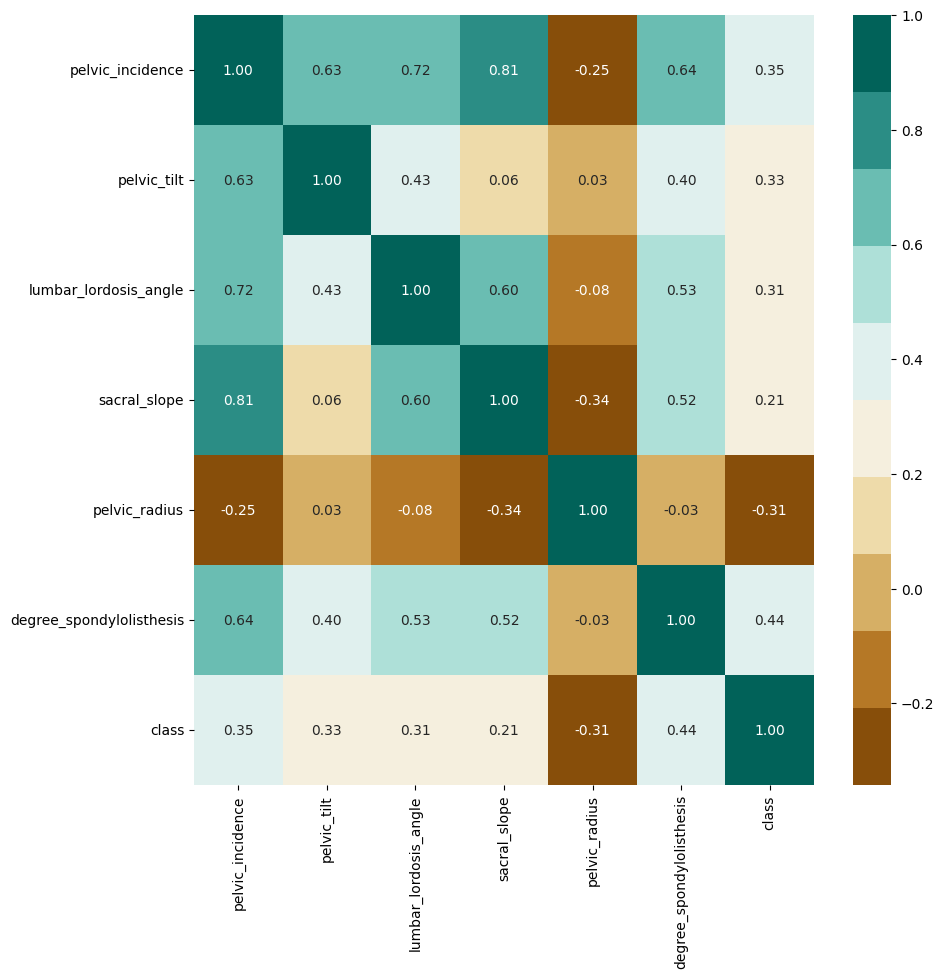

In [22]:
import seaborn as sns
# Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
# Generate Color Map
# colormap = sns.diverging_palette(220, 10, as_cmap=True)
colormap = sns.color_palette("BrBG", 10)
# Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt=".2f")
#ax.set_yticklabels(column_names);
plt.show()